In [1]:
from utils.file_utils import parse_countries_data, standarize_data
import matplotlib.pyplot as plt
attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)
print(attributes)

['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']


In [29]:
from networks.oja import Oja
import numpy as np
import math
eta = 0.0001
iter = 2000
oja = Oja(std,eta)
eigenvector = oja.train(iter)
print("Eigenvector")
print(eigenvector)
# print(std)
pc1s = np.inner(eigenvector,std)
print("PC1")
print(pc1s)


Eigenvector
[ 0.12455953 -0.49946862  0.40921789 -0.48552654  0.18307143 -0.47705044
  0.26646134]
PC1
[-1.07021318 -0.67618985  2.61048769  1.25585672 -0.164391   -0.95025637
  2.4908988  -0.21176419 -0.58973629  0.97286093  1.39865466 -1.57266087
 -1.81465791 -0.85786112  2.31358295  1.53244654 -3.4693335  -1.83811241
 -2.10610144  1.46976665  0.51847537  0.78514661  0.06322717 -0.17984017
 -0.88500183 -3.27944379  4.60037971 -0.34621991]


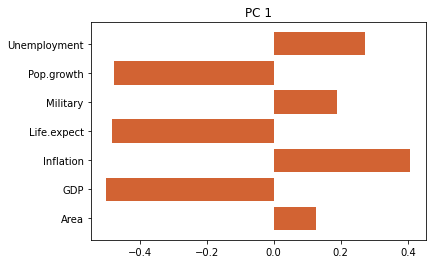

In [5]:
for i in range(len(eigenvector)):
    plt.title("PC 1")
    plt.barh(range(len(eigenvector)), eigenvector, color="#d26333")
    plt.yticks(range(len(attributes)), attributes)

([<matplotlib.axis.YTick at 0x7fd069882dc0>,
 [Text(0, 0, 'Austria'),
  Text(0, 1, 'Belgium'),
  Text(0, 2, 'Bulgaria'),
  Text(0, 3, 'Croatia'),
  Text(0, 4, 'Czech Republic'),
  Text(0, 5, 'Denmark'),
  Text(0, 6, 'Estonia'),
  Text(0, 7, 'Finland'),
  Text(0, 8, 'Germany'),
  Text(0, 9, 'Greece'),
  Text(0, 10, 'Hungary'),
  Text(0, 11, 'Iceland'),
  Text(0, 12, 'Ireland'),
  Text(0, 13, 'Italy'),
  Text(0, 14, 'Latvia'),
  Text(0, 15, 'Lithuania'),
  Text(0, 16, 'Luxembourg'),
  Text(0, 17, 'Netherlands'),
  Text(0, 18, 'Norway'),
  Text(0, 19, 'Poland'),
  Text(0, 20, 'Portugal'),
  Text(0, 21, 'Slovakia'),
  Text(0, 22, 'Slovenia'),
  Text(0, 23, 'Spain'),
  Text(0, 24, 'Sweden'),
  Text(0, 25, 'Switzerland'),
  Text(0, 26, 'Ukraine'),
  Text(0, 27, 'United Kingdom')])

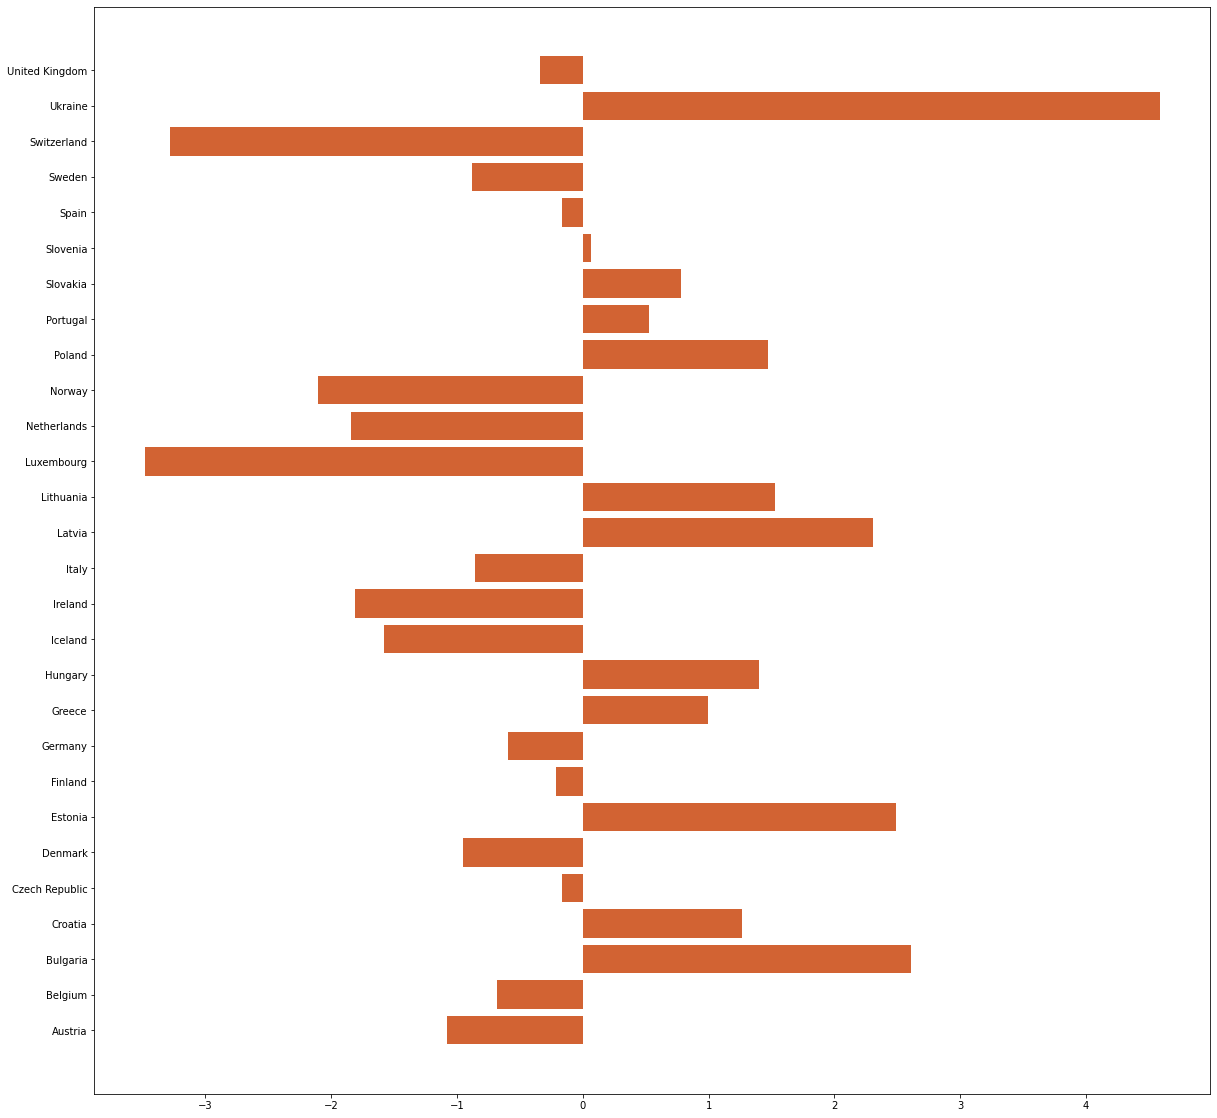

In [32]:
plt.figure(figsize=(20,20))
plt.barh(range(len(pc1s)), pc1s, color="#d26333")
plt.yticks(range(len(countries)), countries)
#plt.bar(range(len(pc1s)), pc1s, color="#d26333")
#plt.xticks(range(len(countries)), countries)

In [2]:
from networks.oja import Oja
import numpy as np
import math
eta = 0.0001
iter = 2000
executions = 10
oja = Oja(std,eta)
avg_eigenvector = np.zeros(7)
for i in range(executions):
    eigenvector = oja.train(iter)
    # print("Eigenvector")
    if eigenvector[0] < 0:
        eigenvector = -eigenvector
    # print(eigenvector)
    avg_eigenvector = avg_eigenvector + eigenvector

avg_eigenvector = avg_eigenvector/executions
print("AVG")
print(avg_eigenvector)
pc1s = np.inner(avg_eigenvector,std)
print("PC1")
print(pc1s)

AVG
[ 0.12558462 -0.50044121  0.40722765 -0.48302765  0.18750093 -0.47555494
  0.27129755]
PC1
[-1.08102574 -0.68122277  2.60918514  1.26789445 -0.16793259 -0.95544696
  2.48749533 -0.21003363 -0.59177686  0.99748775  1.39668493 -1.58216117
 -1.80929156 -0.85300587  2.30629995  1.53011878 -3.47779509 -1.84069389
 -2.10653634  1.47241469  0.52554973  0.78295226  0.06581292 -0.16301469
 -0.88386478 -3.28258223  4.58502843 -0.34054017]


In [65]:
iter = 1000
executions = 10
library_eigenvector = [0.124874,-0.500506,0.406518,-0.482873,0.188112,-0.475704,0.271656]
difference_list = []
etas_list = [0.1,0.01,0.001,0.0001,0.00001]
for eta in etas_list:
    oja = Oja(std,eta)
    avg_eigenvector = np.zeros(7)
    for i in range(executions):
        eigenvector = oja.train(iter)
        if eigenvector[0] < 0:
            eigenvector = -eigenvector
        avg_eigenvector = avg_eigenvector + eigenvector

    avg_eigenvector = avg_eigenvector/executions
    
    difference = 0
    
    for j in range(len(avg_eigenvector)):
        difference += abs(avg_eigenvector[j] - library_eigenvector[j])
    difference = difference/len(avg_eigenvector)
    difference_list.append(difference)
    # print("Difference is {}".format(difference))

print(difference_list)


    
    

[0.4837561466471668, 0.042193776528684286, 0.003926562674996849, 0.0006719239271370585, 0.25079255108769]


<BarContainer object of 5 artists>

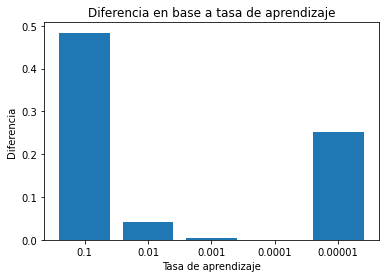

In [70]:
etas_strings= ["0.1","0.01","0.001","0.0001","0.00001"]
plt.title("Diferencia en base a tasa de aprendizaje")
ax = plt.gca()
ax.set_ylabel('Diferencia')
ax.set_xlabel('Tasa de aprendizaje')
plt.bar(etas_strings,difference_list)
# plt.yticks(range(len(etas_list)), etas_list)